# Goal

We're prototyping `source_maps.py` to get some useful outputs.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import astropy.table

In [3]:
%run ../source_maps.py



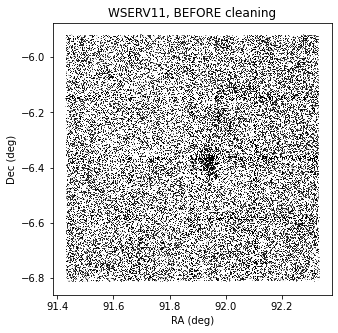

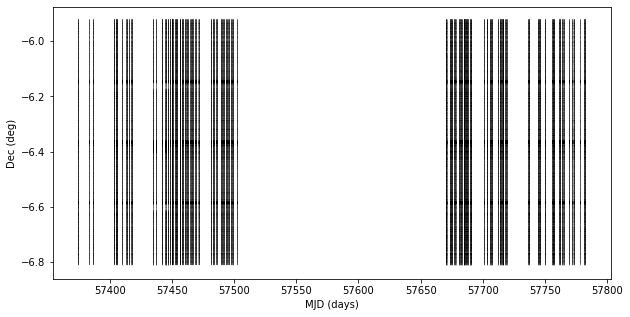

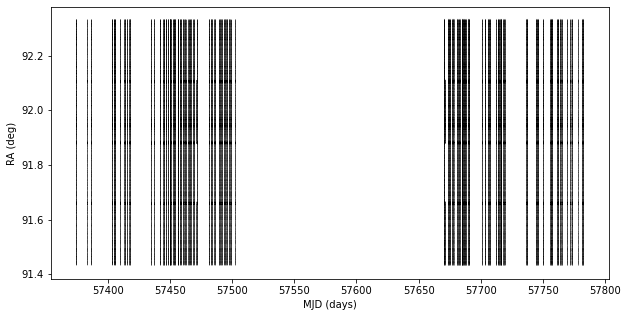

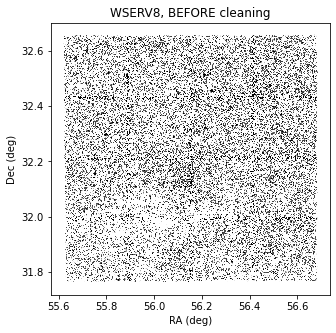

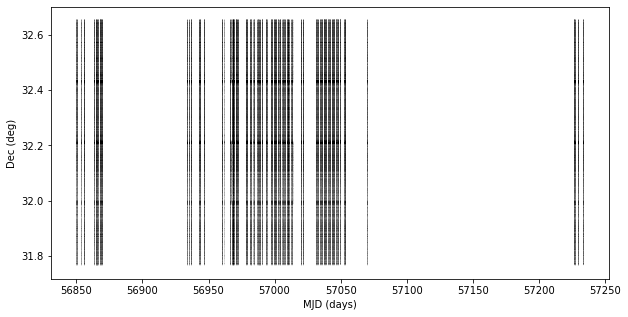

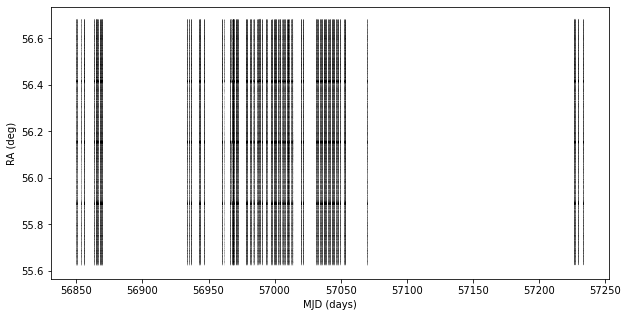

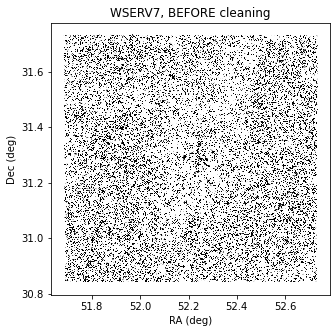

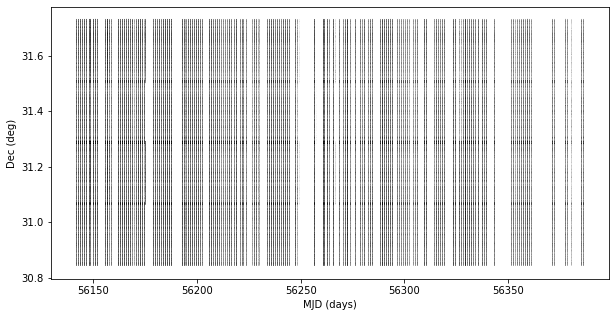

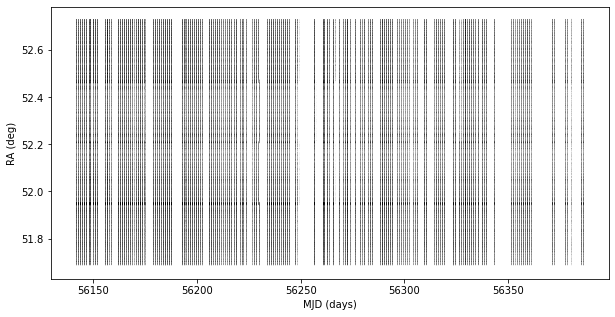

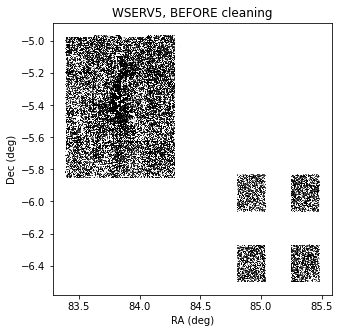

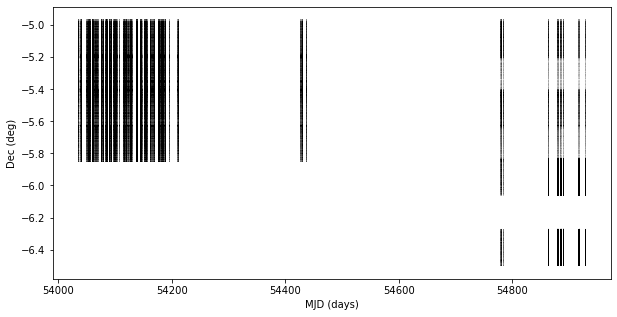

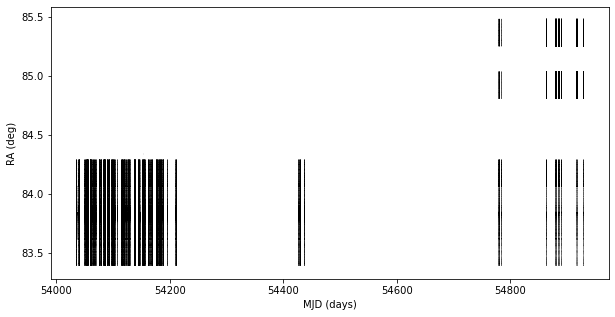

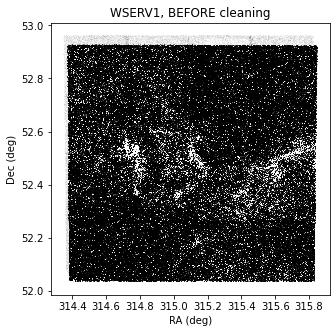

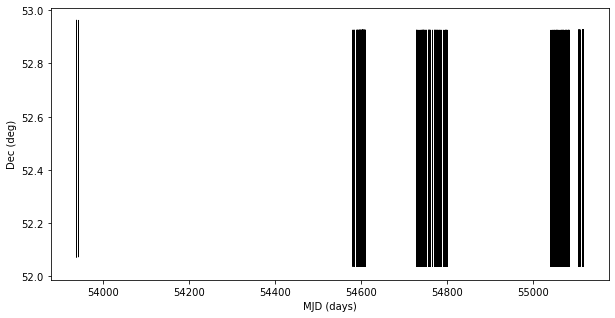

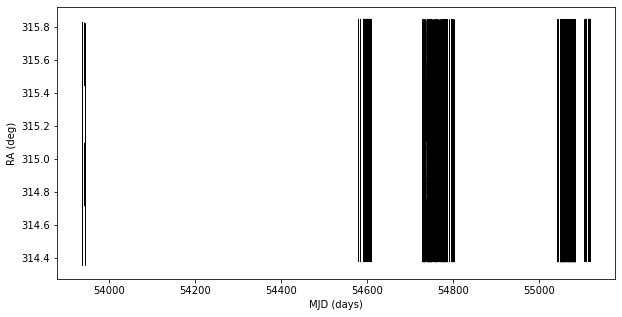

In [18]:
wserv_ids = [1, 5, 7, 8, 11]
raw_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads"
for wserv in wserv_ids[::-1]:
    raw_path = os.path.join(raw_root, f"WSERV{str(wserv)}.fits.gz",)
    raw_dat = astropy.table.Table.read(raw_path)
    
    plt.figure(figsize=(5,5))
    
    plt.plot(np.degrees(raw_dat['RA']), np.degrees(raw_dat['DEC']), 'k,', alpha=0.01)
    plt.title(f"WSERV{str(wserv)}, BEFORE cleaning")
    plt.xlabel("RA (deg)")
    plt.ylabel("Dec (deg)")
    
    plt.figure(figsize=(10,5))
    plt.plot(raw_dat['MEANMJDOBS'], np.degrees(raw_dat['DEC']), 'k,', alpha=0.01)
    plt.xlabel("MJD (days)")
    plt.ylabel("Dec (deg)")

    plt.figure(figsize=(10,5))
    plt.plot(raw_dat['MEANMJDOBS'], np.degrees(raw_dat['RA']), 'k,', alpha=0.01)
    plt.xlabel("MJD (days)")
    plt.ylabel("RA (deg)")

